# (一)載入資料

In [46]:
import pandas as pd
pokemon = pd.read_csv('C:/Users/qwe12/pokemon.csv')
pokemon.head(10)

,#,Name,Type_1,Type_2,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,1,False
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False
7,6,CharizardMega Charizard X,Fire,Dragon,634,78,130,111,130,85,100,1,False
8,6,CharizardMega Charizard Y,Fire,Flying,634,78,104,78,159,115,100,1,False
9,7,Squirtle,Water,NaN,314,44,48,65,50,64,43,1,False


# (二)資料清洗

In [47]:
pokemon = pokemon.drop("#", axis = 1)

In [48]:
pokemon.isnull().sum()

Name            0
Type_1          1
Type_2        385
Total           0
HP              0
Attack          0
Defense         0
Sp_Atk          0
Sp_Def          0
Speed           0
Generation      0
Legendary       0
dtype: int64

In [49]:
pokemon[pokemon.Type_1.isnull()]

,Name,Type_1,Type_2,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Generation,Legendary
37,Nidoran,NaN,273,46,57,40,40,40,50,1,1,False


In [50]:
pokemon[pokemon.Type_2.isnull()]

,Name,Type_1,Type_2,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Generation,Legendary
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,1,False
9,Squirtle,Water,NaN,314,44,48,65,50,64,43,1,False
10,Wartortle,Water,NaN,405,59,63,80,65,80,58,1,False
11,Blastoise,Water,NaN,530,79,83,100,85,105,78,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...
775,Sliggoo,Dragon,NaN,452,68,75,53,83,113,60,6,False
776,Goodra,Dragon,NaN,600,90,100,70,110,150,80,6,False
788,Bergmite,Ice,NaN,304,55,69,85,32,35,28,6,False
789,Avalugg,Ice,NaN,514,95,117,184,44,46,28,6,False


In [51]:
#處理Type_1的缺失值及誤植
pokemon['Type_1']=pokemon['Type_1'].fillna('Poison')
pokemon.iloc[37, 2] = pokemon.iloc[37, 2].replace('273','Non')

#處理Type_2的缺失值
pokemon['Type_2']=pokemon['Type_2'].fillna('Non')

In [52]:
pokemon.isnull().sum()

Name          0
Type_1        0
Type_2        0
Total         0
HP            0
Attack        0
Defense       0
Sp_Atk        0
Sp_Def        0
Speed         0
Generation    0
Legendary     0
dtype: int64

In [53]:
pokemon.head(10)

,Name,Type_1,Type_2,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Generation,Legendary
0,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,Charmander,Fire,Non,309,39,52,43,60,50,65,1,False
5,Charmeleon,Fire,Non,405,58,64,58,80,65,80,1,False
6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False
7,CharizardMega Charizard X,Fire,Dragon,634,78,130,111,130,85,100,1,False
8,CharizardMega Charizard Y,Fire,Flying,634,78,104,78,159,115,100,1,False
9,Squirtle,Water,Non,314,44,48,65,50,64,43,1,False


# (三)資料探索及視覺化

## 1.基本統計量

In [54]:
pokemon.describe()

,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Generation
count,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,434.818750,69.272500,78.980000,73.842500,72.820000,71.915000,68.216250,3.32375
std,120.613641,25.525089,32.477347,31.183501,32.722294,27.816811,29.150543,1.66129
min,46.000000,1.000000,5.000000,5.000000,10.000000,20.000000,1.000000,1.00000
25%,330.000000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,450.000000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,515.000000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,780.000000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


## 2.寶可夢的世代分布

In [55]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Text(0, 0.5, 'Numner')

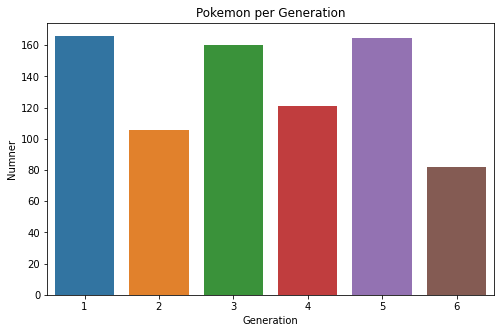

In [56]:
plt.figure(figsize=(8,5))
plt.title('Pokemon per Generation')
sns.countplot(data = pokemon, x = pokemon['Generation'])
plt.ylabel('Numner')

## 3.寶可夢第一屬性及第二屬性的分布

Text(0, 0.5, 'Numner')

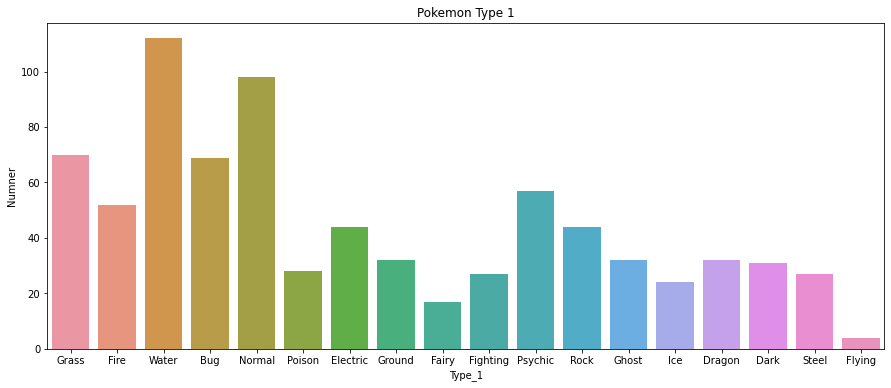

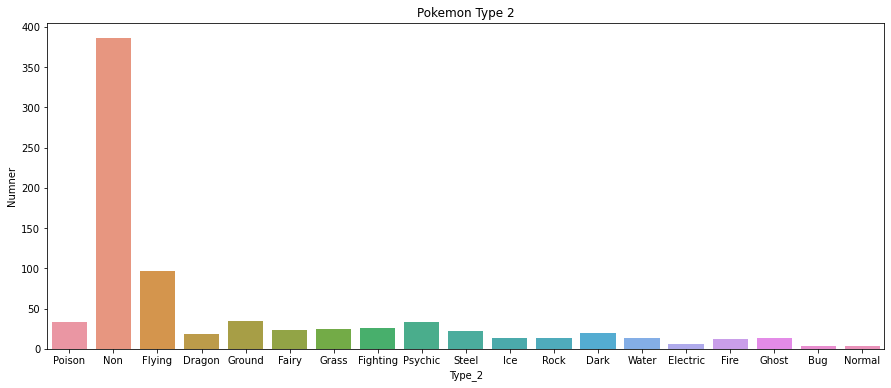

In [57]:
#第一屬性
plt.figure(figsize=(15,6))
plt.title('Pokemon Type 1')
sns.countplot(data = pokemon, x = pokemon['Type_1'])
plt.ylabel('Numner')
#第二屬性
plt.figure(figsize=(15,6))
plt.title('Pokemon Type 2')
sns.countplot(data = pokemon, x = pokemon['Type_2'])
plt.ylabel('Numner')

## 4. 不同變數間的關係

In [58]:
pokemon_1 = pokemon.drop(['Name','Type_1','Type_2','Generation','Legendary'], axis=1)

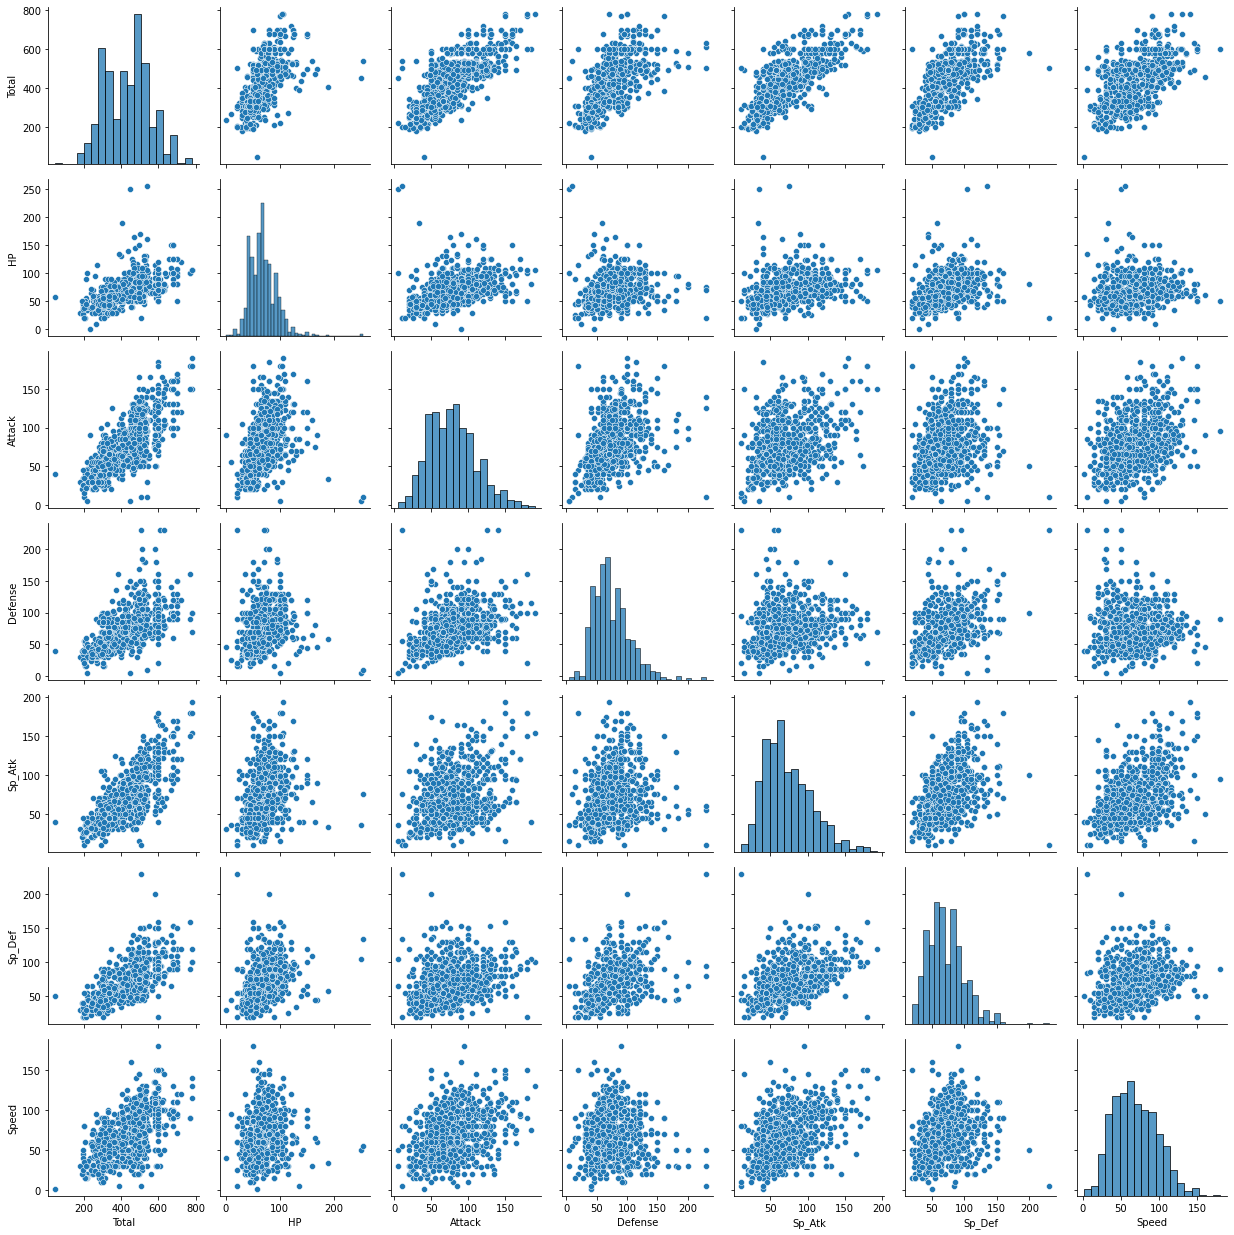

In [59]:
g = sns.PairGrid(pokemon_1)
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)

## 5.各變數間的相關係數

<AxesSubplot:>

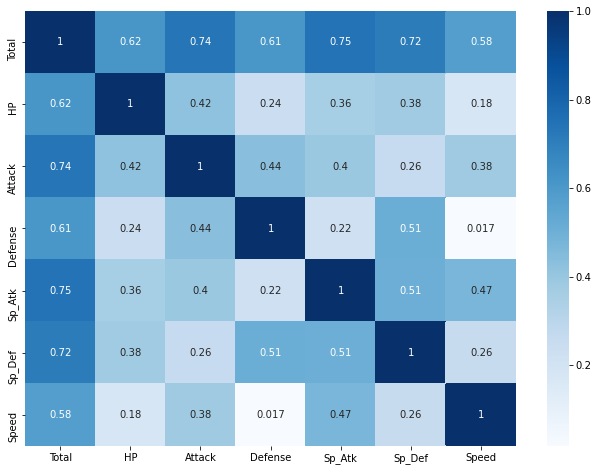

In [60]:
plt.figure(figsize=(11,8))
corr = pokemon_1.corr() 
sns.heatmap(corr, cmap='Blues', annot=True)

# (四)羅吉斯迴歸

In [61]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn import preprocessing, linear_model
from sklearn.feature_selection import f_regression
from sklearn.metrics import confusion_matrix

In [62]:
#創建dummy variables
label_encoder = preprocessing.LabelEncoder()
encoded_Type_1 = label_encoder.fit_transform(pokemon['Type_1'])
encoded_Type_2 = label_encoder.fit_transform(pokemon['Type_2'])
encoded_Legendary = label_encoder.fit_transform(pokemon['Legendary'])

In [63]:
#建立x
df_x = pd.DataFrame([encoded_Type_1,
                     encoded_Type_2,
                     pokemon['Total'],
                     pokemon['HP'],
                     pokemon['Attack'],
                     pokemon['Defense'],
                     pokemon['Sp_Atk'],
                     pokemon['Sp_Def'],
                     pokemon['Speed'],
                     pokemon['Generation']
                     
]).T

df_x.head(10)

,0,1,2,3,4,5,6,7,8,9
0,9,14,318,45,49,49,65,65,45,1
1,9,14,405,60,62,63,80,80,60,1
2,9,14,525,80,82,83,100,100,80,1
3,9,14,625,80,100,123,122,120,80,1
4,6,12,309,39,52,43,60,50,65,1
5,6,12,405,58,64,58,80,65,80,1
6,6,7,534,78,84,78,109,85,100,1
7,6,2,634,78,130,111,130,85,100,1
8,6,7,634,78,104,78,159,115,100,1
9,17,12,314,44,48,65,50,64,43,1


In [64]:
#建立y
df_y = pd.DataFrame([
    encoded_Legendary
]).T

df_y.head(5)

,0
0,0
1,0
2,0
3,0
4,0


In [65]:
#分割訓練資料及測試資料
x_train, x_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.2)

In [66]:
#建立羅吉斯迴歸模型歸
logistic_regr = linear_model.LogisticRegression()
logistic_regr.fit(x_train, y_train.values.ravel())

C:\Users\qwe12\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [67]:
#準確率
Logis_Legendary = logistic_regr.predict(x_test)
accuracy_logis = logistic_regr.score(x_test, y_test)
print(accuracy_logis)

0.91875


In [68]:
#混淆矩陣
y_true = np.array(y_test)
y_pred = Logis_Legendary
confusion_matrix(y_true, y_pred)

array([[143,   5],
       [  8,   4]], dtype=int64)

# (五)決策樹

In [69]:
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn import preprocessing, metrics
from IPython.display import Image  

In [70]:
#建立x及y
x = pokemon[['Total', 'HP', 'Attack', 'Defense', 'Sp_Atk', 'Sp_Def', 'Speed']]
y = pokemon[['Legendary']]

In [71]:
#分割訓練資料及測試資料
train_tree_x,test_tree_x,train_tree_y,test_tree_y = train_test_split(x,y,random_state=0, test_size=0.2)

In [72]:
#建立決策樹模型
clf = tree.DecisionTreeClassifier()
pokemon_clf = clf.fit(train_tree_x, train_tree_y)

In [73]:
#將測試資料放入模型進行預測
test_tree_y_predicted = pokemon_clf.predict(test_tree_x)
print(test_tree_y_predicted)

[False False False False False False False False False False False False
 False False False False False False  True False False False False False
  True False  True False False False False False False False False False
 False False False False False  True False False False False False False
 False False False False False False False False False False False False
  True False False False False False False False False False False  True
 False False False False False False False  True False False False  True
 False False False False False False False False False False False  True
 False False False False False  True False False False False False False
 False False False False False False False False False False False False
 False False False  True False False False False False  True False False
 False  True  True False False False False False False False False False
 False  True False  True False False False False False False False False
 False False False False]


In [74]:
#準確率
accuracy_tree = metrics.accuracy_score(test_tree_y, test_tree_y_predicted)
print(accuracy_tree)

0.94375


In [75]:
#混淆矩陣
confusion_matrix(test_tree_y, test_tree_y_predicted)

array([[140,   5],
       [  4,  11]], dtype=int64)

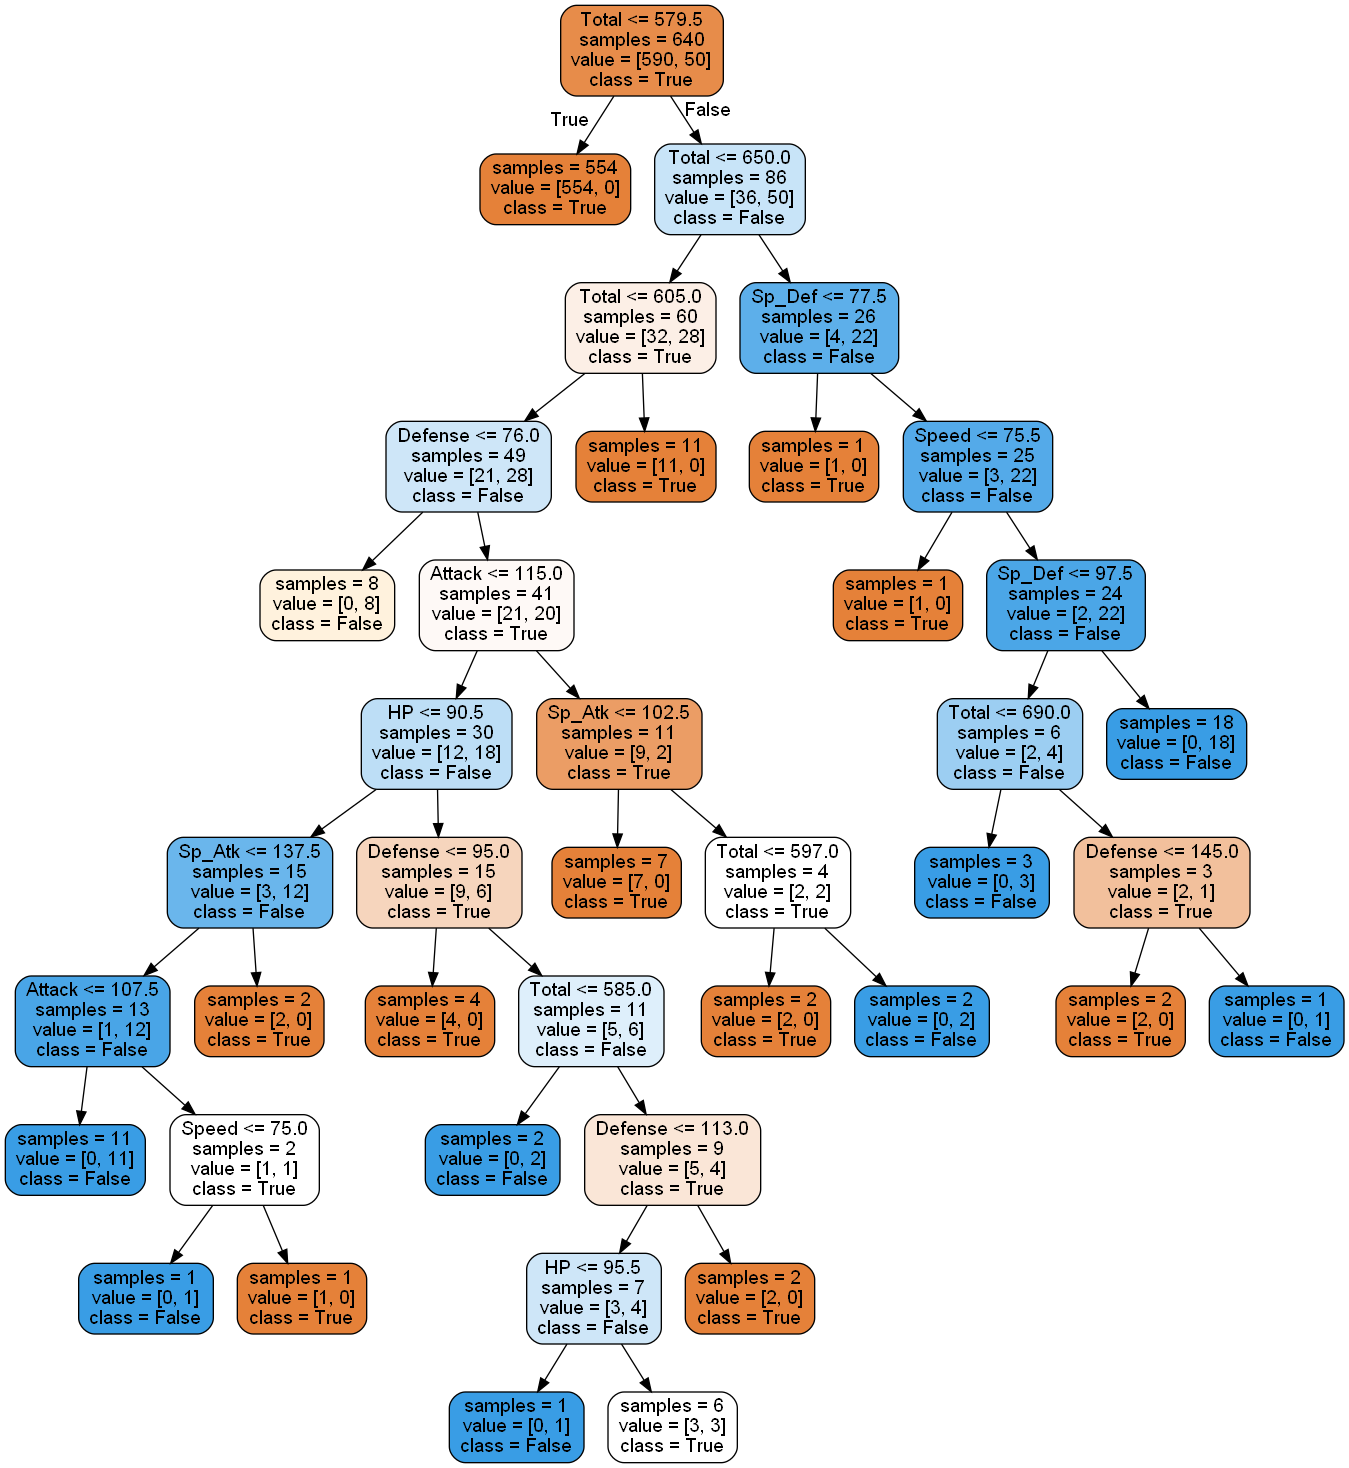

In [76]:
#畫出決策樹
y_name = np.array(['True','False'])
y_name 

dot_data =tree.export_graphviz(
        pokemon_clf,
        out_file = None,
        feature_names = list(x.columns.values),
        class_names=y_name,
        filled = True,
        impurity = False,
        rounded = True
    )

%matplotlib inline
import pydotplus
graph = pydotplus.graph_from_dot_data(dot_data)
graph.get_nodes()[7].set_fillcolor("#FFF2DD")
Image(graph.create_png(), width=8000, height=40000)

# (六)隨機森林

In [77]:
from sklearn import ensemble, preprocessing, metrics
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.ensemble import RandomForestClassifier

In [78]:
#分割訓練資料及測試資料
train_rf_x,test_rf_x,train_rf_y,test_rf_y = train_test_split(x,y,random_state=0, test_size=0.2)

In [79]:
#建立隨機森林模型
forest = ensemble.RandomForestClassifier(n_estimators = 100)
forest_fit = forest.fit(train_rf_x, train_rf_y.values.ravel())

In [80]:
#預測
test_rf_y_predicted = forest.predict(test_rf_x)

In [81]:
#準確率
accuracy_rf = metrics.accuracy_score(test_rf_y, test_rf_y_predicted)
print(accuracy_rf)

0.96875


In [82]:
#混淆矩陣
confusion_matrix(test_rf_y, test_rf_y_predicted)

array([[142,   3],
       [  2,  13]], dtype=int64)

# (七)SVM

In [83]:
from sklearn import svm

In [84]:
#分割訓練資料及測試資料
train_svm_x,test_svm_x,train_svm_y,test_svm_y = train_test_split(x,y,random_state=0, test_size=0.2)

In [85]:
#建立SVM模型
svc = svm.SVC()
svc_fit = svc.fit(train_svm_x, train_svm_y.values.ravel())

In [86]:
#預測
test_svm_y_predicted = svc.predict(test_svm_x)

In [87]:
#準確率
accuracy_svm = metrics.accuracy_score(test_svm_y, test_svm_y_predicted)
print(accuracy_svm)

0.93125


In [88]:
#混淆矩陣
confusion_matrix(test_svm_y, test_svm_y_predicted)

array([[143,   2],
       [  9,   6]], dtype=int64)